In [47]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1.머신러닝 개념(ML)

- 데이터를 기반으로 패턴을 학습하고 결과를 추론하는 알고리즘 기법
- 지도학습(Supervised Learning) 과 비지도학습(Un-Supervised Learning) , 강화학습(Reinforcement Learning)
- 지도학습   - 분류, 회귀
- 비지도학습 - 군집화(클러스터링) , 차원축소(PCA) 

#### 머신러닝 용어?
- 피처(feature) : 데이터의 일반 속성
- 레이블, 클래스, 타겟 값, 결정 값 : 정답데이터를 의미한다


#### Supervised Learning - classification
- step 01. 데이터세트 분리(학습 데이터, 테스트 데이터)
- step 02. 학습 데이터를 기반으로 ML 알고리즘을 적용해 학습 모델을 만든다 - fit()
- step 03. 분류예측을 수행(테스트 데이터) - predict()
- step 04. 평가

#### 분류(Classifier)
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- GaussianNB
- SVC

#### 회귀(Regressior)
- LinearRegression
- Ridge
- Lasso
- RandomForestRegression
- GradientBoostingRegression

### 2.sklearn 패키지 

In [5]:
import sklearn

In [6]:
sklearn.__version__

'1.1.1'

In [1]:
# 주로 아래와 같이 많이 사용될거다

from sklearn.datasets import load_boston

### 3.load_data

In [27]:
from sklearn.datasets import load_iris
iris_bunch = load_iris() # 굉장히 많은 속성이 들어있다

In [30]:
# 타입을 한번 확인해보자
type(iris_bunch) # Bunch

# 어떤 속성들에 접근할 수 있는지 알아보자
iris_bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
# 데이터가 ndarray 형태로 들어가있다
type(iris_bunch.data) 

# feature_names
iris_bunch.feature_names

numpy.ndarray

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
# target값도 따로 있다
iris_bunch.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
# pd.DataFrame 형태로 만들어보자
data = iris_bunch.data
col_names = iris_bunch.feature_names
iris_df =  pd.DataFrame(data,columns=col_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
# label도 포함시켜서 Dataframe 만들어 보자
data = iris_bunch.data
col_names = iris_bunch.feature_names
iris_df =  pd.DataFrame(data,columns=col_names)
iris_df['class'] = iris_bunch.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
# 데이터 종류마다 접근할수 있는 속성들은 조금씩 다른거 같다
from sklearn.datasets import load_digits
mnist_bunch = load_digits()
mnist_bunch.keys() # 여기는 images도 존재하네?

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

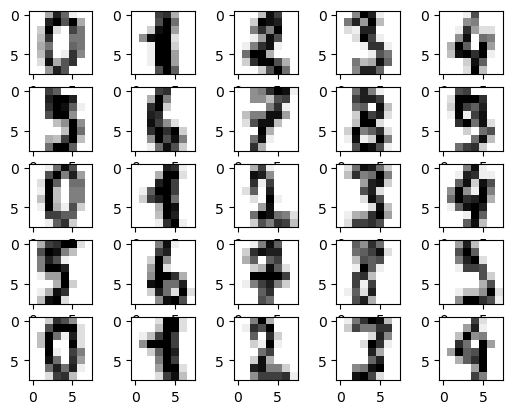

In [26]:
# images이용해서 몇개만 출력해보자
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5,5)

for i,ax in enumerate(axes.flatten()):
    ax.imshow(mnist_bunch.images[i],cmap='binary')

### 4.Spliting the dataset

**train_test_split()**
- Input을 받아서 split한 결과를 돌려준다
- Input 두개 넣으면 총 4개 돌려주는거다
- ndarray, dataframe 다 input으로 가능하다

- train_size, test_size를 지정가능하다
    - If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
- random state 지정 가능
- shuffle 기능 존재 => default:True다

**Why do we need this?**

In [63]:
# train_test_split() 함수를 가장 많이 쓸거다
from sklearn.model_selection import train_test_split

In [62]:
# numpy 객체로 실험 => output도 numpy객체로 준다
test_np = np.arange(100).reshape(20,5) # 총 행이 20개

train,test =train_test_split(test_np,test_size=10) # test 갯수 10개로 강제
test
train,test =train_test_split(test_np,train_size=0.8) # train_size = 0.8 -> test_size = 0.2 -> 20*0.2는 총 4개다 
test

array([[70, 71, 72, 73, 74],
       [60, 61, 62, 63, 64],
       [95, 96, 97, 98, 99],
       [50, 51, 52, 53, 54],
       [45, 46, 47, 48, 49],
       [55, 56, 57, 58, 59],
       [15, 16, 17, 18, 19],
       [75, 76, 77, 78, 79],
       [10, 11, 12, 13, 14],
       [30, 31, 32, 33, 34]])

array([[85, 86, 87, 88, 89],
       [35, 36, 37, 38, 39],
       [10, 11, 12, 13, 14],
       [60, 61, 62, 63, 64]])

In [78]:
# pd.DataFrame 객체로 X_train,X_test,y_train,y_test 받아보자
features = iris_df.iloc[:,:-1]
targets = iris_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=0.2)

len(X_train) , len(X_test) # 120개랑 30개로 잘 나뉘어있다
len(y_train) , len(y_test)

X_test # pd.DataFrame 을 넣었으니깐 반환 타입이 pd.DataFrame 이다

(120, 30)

(120, 30)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
104,6.5,3.0,5.8,2.2
14,5.8,4.0,1.2,0.2
93,5.0,2.3,3.3,1.0
76,6.8,2.8,4.8,1.4
25,5.0,3.0,1.6,0.2
0,5.1,3.5,1.4,0.2
108,6.7,2.5,5.8,1.8
137,6.4,3.1,5.5,1.8
70,5.9,3.2,4.8,1.8
33,5.5,4.2,1.4,0.2


> Shuffle option 
> - default가 True다

In [84]:
# shuffle
iris_df.iloc[:3,:] # 현재 iris data를 보면 인간적으로 너무 말끔히 정렬이 되어있다
# 예를 들어서 train을 앞쪽에서 100개, 50개로 했다고 생각해보자
# 0~50까지는 class 0, 50~100까지는 class 1이고, 100~150까지는 class 2다
# 이경우에 class 0,1 만을 가지고 class 2를 예측하는건 말이 안된다

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [95]:
features = iris_df.iloc[:,:-1]
targets = iris_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=50,shuffle=False)
np.unique(y_train,return_counts=True)


X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=50,shuffle=True)
np.unique(y_train,return_counts=True) # 골고루 들어가있다

(array([0, 1]), array([50, 50]))

(array([0, 1, 2]), array([35, 31, 34]))

### 5.Model
가장 기본적인 모델의 개념을 살펴보기 위해 supervised learning 기반으로 생각한다
- step 01. 데이터세트 분리(학습 데이터, 테스트 데이터)
- step 02. 학습 데이터를 기반으로 ML 알고리즘을 적용해 학습 모델을 만든다 - fit()
- step 03. 분류예측을 수행(테스트 데이터) - predict()
- step 04. 평가

In [81]:
# 한번에 다 정리해보자
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_bunch = load_iris()
data = iris_bunch.data
col_names = iris_bunch.feature_names

iris_df = pd.DataFrame(data,columns=col_names)
iris_df['class'] = iris_bunch.target

X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,:-1],iris_df[:,-1],test_size=0.2,shuffle=True)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
